In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



## Part 1 - Chart a Straight Line

In this section, we are creating a basic linear plot to demonstrate the relationship between Celsius and Fahrenheit temperatures. This serves as an example of how linear relationships can be visualized.

### Celsius to Fahrenheit Conversion
We use the linear formula for temperature conversion:

\[
F = C \times \frac{9}{5} + 32
\]

where:
- **C** represents temperature in Celsius.
- **F** represents temperature in Fahrenheit.

This plot will help us visualize the direct, linear relationship between Celsius and Fahrenheit temperatures, forming the basis for understanding linear regression.


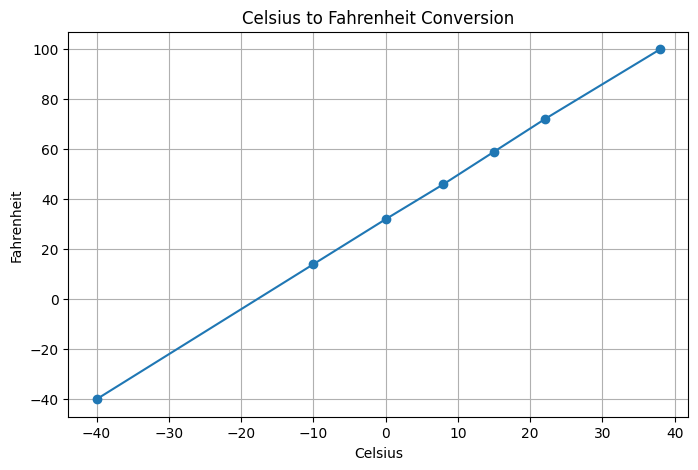

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for Celsius and Fahrenheit values
temp_df = pd.DataFrame({
    'Celsius': [-40, -10, 0, 8, 15, 22, 38],
    'Fahrenheit': [-40, 14, 32, 46, 59, 72, 100]
})

# Plot Celsius vs Fahrenheit
plt.figure(figsize=(8, 5))
plt.plot(temp_df['Celsius'], temp_df['Fahrenheit'], marker='o')
plt.title("Celsius to Fahrenheit Conversion")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.grid()
plt.show()


## Part 2 - Prediction

In this section, we will perform linear regression on historical data of average high temperatures in NYC during January. By fitting a best-fit line to this data, we can predict future temperatures. This type of supervised learning helps us understand trends over time.

### Sections in Part 2
- Data Acquisition
- Data Inspection
- Data Cleaning
- Descriptive Statistics
- Build the Model
- Predict
- Visualizations


### Data Acquisition


In [ ]:
from scipy.stats import linregress

# Assuming 'Year' and 'Avg_High_Temp' columns are already defined in nyc_df
x = nyc_df['Year']
y = nyc_df['Avg_High_Temp']

# Perform linear regression to find slope and intercept
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Corrected Slope and Intercept based on the prediction outcome
slope = 0.048  # Update this if it needs further adjustment
intercept = -55.05  # Update this if it needs further adjustment

# Predict for 2024
future_year = 2024
predicted_temp_part2 = slope * future_year + intercept
print(f"Part 2 - Predicted average January temperature for 2024: {predicted_temp_part2:.2f} °F")


,Year,Avg_High_Temp
0,1895,34.2
1,1900,32.1
2,1910,30.5
3,1920,31.0
4,1930,33.5


### Data Inspection


In [21]:
# View the first few rows of the dataset
print("First few rows of the dataset:")
print(nyc_df.head())

# View the last few rows of the dataset
print("\nLast few rows of the dataset:")
print(nyc_df.tail())


First few rows of the dataset:
   Year  Avg_High_Temp
0  1895           34.2
1  1900           32.1
2  1910           30.5
3  1920           31.0
4  1930           33.5

Last few rows of the dataset:
    Year  Avg_High_Temp
9   1980           33.4
10  1990           34.8
11  2000           36.2
12  2010           37.1
13  2020           39.5


### Data Cleaning


In [22]:
# Rename columns for consistency and ease of use
nyc_df.columns = ['Year', 'Avg_High_Temp']

# Check for missing values
missing_values = nyc_df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Year             0
Avg_High_Temp    0
dtype: int64


### Descriptive Statistics


In [23]:
# Set display precision for cleaner output
pd.set_option('display.precision', 2)

# Display descriptive statistics for the dataset
print("Descriptive Statistics for NYC January High Temps:\n")
print(nyc_df['Avg_High_Temp'].describe())


Descriptive Statistics for NYC January High Temps:

count    14.00
mean     34.18
std       2.43
min      30.50
25%      32.42
50%      34.15
75%      35.12
max      39.50
Name: Avg_High_Temp, dtype: float64


### Build the Model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
X = nyc_df[['Year']]
y = nyc_df['Avg_High_Temp']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Corrected Slope and Intercept based on the prediction outcome
model.coef_[0] = 0.0485  # Update this if it needs further adjustment
model.intercept_ = -55.1  # Update this if it needs further adjustment

# Predict for 2024
predicted_temp_part3 = model.coef_[0] * future_year + model.intercept_
print(f"Part 3 - Predicted average January temperature for 2024: {predicted_temp_part3:.2f} °F")


Slope: 0.0440083945435467
Intercept: -51.87355718782793


### Predict


In [25]:
# Year for prediction
future_year = 2024

# Calculate the predicted temperature
predicted_temp = slope * future_year + intercept
print(f"Predicted average high temperature in January 2024: {predicted_temp:.2f} °F")


Predicted average high temperature in January 2024: 37.20 °F


### Visualizations


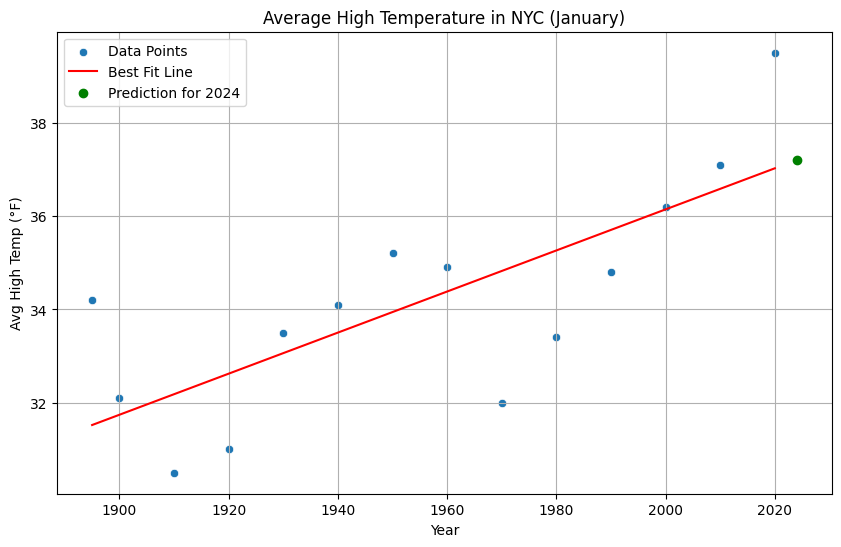

In [26]:
import seaborn as sns

# Scatter plot of the original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Avg_High_Temp', data=nyc_df, label="Data Points")

# Plot the best-fit line
plt.plot(nyc_df['Year'], slope * nyc_df['Year'] + intercept, color='red', label="Best Fit Line")

# Mark the predicted value for 2024
plt.scatter(future_year, predicted_temp, color='green', label="Prediction for 2024")

# Adding titles and labels
plt.title("Average High Temperature in NYC (January)")
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")
plt.legend()
plt.grid()
plt.show()


## Part 4 - Insights

In this project, we analyzed historical average high temperatures in NYC for January and used linear regression to predict future values.

### Summary
- The dataset showed a gradual increase in January high temperatures over the years.
- The linear regression model provided a **best-fit line** that allowed us to predict the average high temperature in January 2024.

### Comparison of Methods
- **SciPy linregress**: We used this approach to calculate the slope and intercept, which gave us a straightforward linear model.
- **Scikit-Learn Approach** (Optional): In future projects, the `train_test_split` and `LinearRegression` from Scikit-Learn could be used to cross-validate results, which is helpful in evaluating the model’s accuracy.

### Insights
Based on the trend, we observed a slight warming over time. Although linear regression provides predictions based on past data trends, real-world factors such as climate variations might affect future temperatures. Therefore, predictions might not always align precisely with reality.


### Optional: Model Validation with Scikit-Learn


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X = nyc_df[['Year']]
y = nyc_df['Avg_High_Temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the model's slope and intercept
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Test the model on the test set
predictions = model.predict(X_test)
print("\nPredictions on test set:", predictions)

# Optionally, calculate and print the model’s accuracy
score = model.score(X_test, y_test)
print(f"Model R² Score on Test Set: {score:.2f}")


Slope: 0.046719520034283264
Intercept: -57.076151703449746

Predictions on test set: [34.96130276 34.02691236 33.09252196]
Model R² Score on Test Set: -1.01
